In [1]:
import torch
from torch import nn
import numpy as np
output =torch.rand(100)[..., None]*10

In [18]:
linear=nn.Linear(1, 3)
outputs=linear(output)

In [21]:
outputs[...,3:]

tensor([], size=(100, 0), grad_fn=<SliceBackward0>)

In [2]:
from transforms3d.euler import quat2euler
orientation_list = [0.999999999998296,0, 0, -1.8460861516489738e-06]
roll,pitch, yaw = quat2euler(orientation_list)

In [3]:
roll,pitch, yaw


(0.0, 0.0, -3.6921723033000453e-06)

In [ ]:
normal_dist

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [ ]:
distribution = torch.distributions.Normal(0, 1)

# Calculate the log probability of sample value 0.5
sample_value = torch.tensor(0.5)
log_prob = distribution.log_prob(sample_value)

print(log_prob) 

tensor(-1.0439)


In [9]:
import math

In [8]:
goal_x_list = [5.1081,4.0456,2.7147,1.0915,0.37583,-0.18133,-0.14148,-1.4583,-3.6939,-2.8976,-1.5097,-0.73719,-0.35437,3.36,4.295,5.8217,6.5594,6.6926,2.7248]
goal_y_list = [-9.0511,-9.9685,-9.7536,-9.4915,-4.9754,1.3284,3.7654,3.7568,3.7427,6.2144,6.7212,6.9084,8.079,7.4159,7.4433,7.459,7.686,5.0049,4.9378]

3


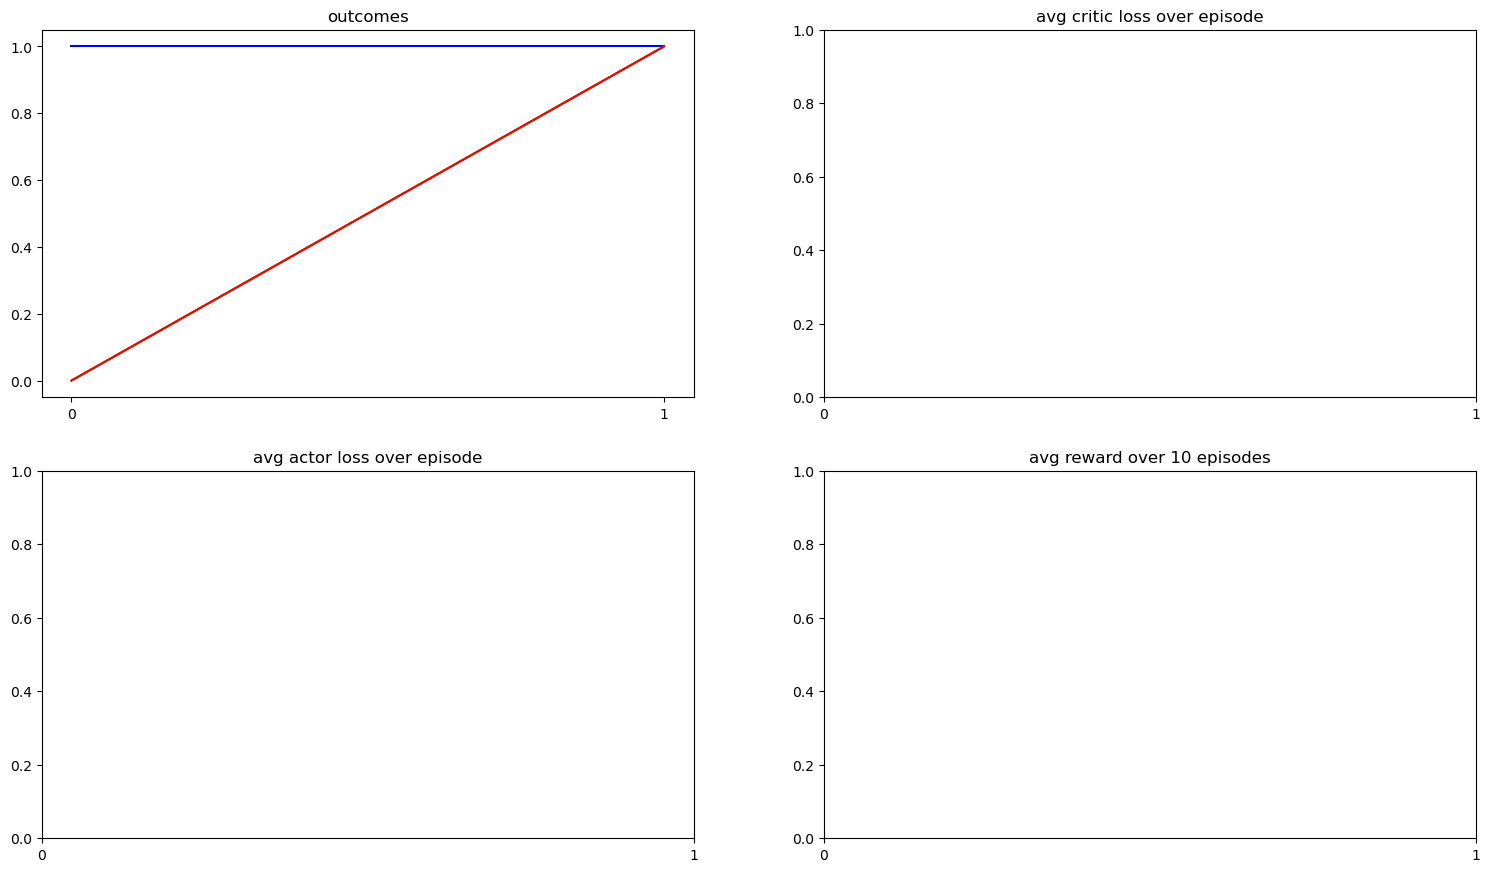

In [5]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
fig, ax1 = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
titles = ['outcomes', 'avg critic loss over episode', 'avg actor loss over episode', 'avg reward over 10 episodes']
legend_labels = ['Success', 'Collision Wall','Timeout']
legend_colors = ['b', 'g', 'r']
for i in range(4):
    ax = ax1[int(i/2)][int(i%2!=0)]
    ax.set_title(titles[i])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
legend_set = False
xaxis = np.array(range(2))
data_outcome_history=[[True,False,False],[False,True,True]]
outcome_histories = [[1],[0],[0]]
if len(data_outcome_history) ==1:
    outcome_histories[0].append(1 if data_outcome_history[0][0]else 0)
    outcome_histories[1].append(1 if data_outcome_history[0][1]else 0)
    outcome_histories[2].append(1 if data_outcome_history[0][2]else 0)
elif len(data_outcome_history)==2:
    outcome_histories[0].append(outcome_histories[0][-1]+data_outcome_history[-1][0])
    outcome_histories[1].append(outcome_histories[1][-1]+data_outcome_history[-1][1])
    outcome_histories[2].append(outcome_histories[2][-1]+data_outcome_history[-1][2])
elif len(data_outcome_history)<=11:
    for idx in range(2,len(data_outcome_history)):
        outcome_histories[0].append(outcome_histories[0][-1]+data_outcome_history[idx][0])
        outcome_histories[1].append(outcome_histories[1][-1]+data_outcome_history[idx][1])
        outcome_histories[2].append(outcome_histories[2][-1]+data_outcome_history[idx][2])
else:
    for idx in range(len(data_outcome_history)-10,len(data_outcome_history)):
        outcome_histories[0].append(outcome_histories[0][-1]+data_outcome_history[idx][0])
        outcome_histories[1].append(outcome_histories[1][-1]+data_outcome_history[idx][1])
        outcome_histories[2].append(outcome_histories[2][-1]+data_outcome_history[idx][2])
print(len(outcome_histories))
if len(data_outcome_history) > 0:
    i = 0
    for outcome_history in np.array(outcome_histories):
        ax1[0][0].plot(xaxis, outcome_history, color=legend_colors[i], label=legend_labels[i])
        i += 1
plt.draw()
plt.pause(0.2)
plt.close()


In [21]:
plt.close('all')

In [1]:
import math

goal_x_list = [-0.7119,0.0704,-1.2834,-2.3205,-1.3063,-0.0213,-2.3906,-2.4354]
goal_y_list = [-0.7305,-3.0386,-4.8031,-7.0388,-8.1956,-6.6932,-0.1634,-2.6551]

for idx in range(len(goal_x_list)):
    for j in range(len(goal_x_list)):
        distance=math.hypot(goal_x_list[idx]-goal_x_list[j],goal_y_list[idx]-goal_y_list[j])
        print(distance)
    print("-----------------")

0.0
2.437071788027591
4.112503253494153
6.510164579332845
7.488726819026049
6.002559424945329
1.7719018313665122
2.583512610768525
-----------------
2.437071788027591
0.0
2.2240131946551034
4.660257809392093
5.337597951326046
3.655750271832035
3.784613063445192
2.5349765067944907
-----------------
4.112503253494153
2.2240131946551034
0.0
2.464534621383924
3.3925772887290284
2.2727460086864086
4.769979866833821
2.4374183063233112
-----------------
6.510164579332845
4.660257809392093
2.464534621383924
0.0
1.538436830032355
2.325029032076804
6.875757352466708
4.385205548204098
-----------------
7.488726819026049
5.337597951326046
3.3925772887290284
1.538436830032355
0.0
1.9769751541180283
8.105056651868637
5.6543794584375044
-----------------
6.002559424945329
3.655750271832035
2.2727460086864086
2.325029032076804
1.9769751541180283
0.0
6.946356637115604
4.7046923831426
-----------------
1.7719018313665122
3.784613063445192
4.769979866833821
6.875757352466708
8.105056651868637
6.946356637

In [8]:
import random
goal_positionx=goal_x_list[0]
goal_positiony=goal_y_list[0]
last_goal_x = goal_x_list[0]
last_goal_y = goal_y_list[0]
DISTANCE_THRESHOLD=2.6
while (goal_positionx==last_goal_x and goal_positiony==last_goal_y) or \
math.hypot(goal_positionx-last_goal_x,goal_positiony-last_goal_y)>DISTANCE_THRESHOLD:
    index=random.randint(0,len(goal_x_list)-1)
    print(index)
    goal_positionx= goal_x_list[index]
    goal_positiony = goal_y_list[index]


2
2
0
3
0
6


In [5]:
math.hypot(goal_positionx-last_goal_x,goal_positiony-last_goal_y)<DISTANCE_THRESHOLD

False